In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import time
import requests
from datetime import datetime, timedelta
from shapely.geometry import Point
from busSim import BusSim
from graph import Graph

In [2]:
DATA_PATH = "../data/mmt_gtfs"
DAY = "monday"
START_STOP = 765
START_TIME = "10:00:00"
ELAPSE_TIME = "00:50:00"
AVG_WALKING_SPEED = 1.4 # 1.4 meters per second
MAX_WALKING_MIN = 10

In [3]:
busSim = BusSim(DATA_PATH, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN)

In [4]:
busSim.stopTimes_final_df

service_id  route_short_name  trip_id  stop_id  stop_sequence  \
35858   93_WKD:S                80  1024699      532              6   
10722     93_WKD                 2  1019362     2146             33   
32537     93_WKD                 8  1020759     2637             10   
15069     93_WKD                 7  1020423     1689             40   
16916     93_WKD                10  1020963     1262              6   
...          ...               ...      ...      ...            ...   
34066   93_WKD:S                80  1024707     2267             16   
48723     93_WKD                30  1022792     9277              8   
10101     93_WKD                10  1020952      234             27   
44428     93_WKD                20  1022093     9719             25   
27521     93_WKD                 6  1020103     1730             28   

         arrival_time  shape_dist_traveled   stop_lat   stop_lon  \
35858 0 days 10:00:05               0.7676  43.075254 -89.412549   
10722 0 days 10:00:07               5.5634  43.072801 -89.421956   
32537 0 days 10:00:09               1.7232  43.068706 -89.454013   
15069 0 days 10:00:12               7.0684  43.083665 -89.361729   
16916 0 days 10:00:12               0.6739  43.094118 -89.353693   
...               ...                  ...        ...        ...   
34066 0 days 10:49:52               2.5468  43.076382 -89.419943   
48723 0 days 10:49:53               1.5050  43.104384 -89.300107   
10101 0 days 10:49:53               4.3380  43.073427 -89.403883   
44428 0 days 10:49:55               6.2791  43.121258 -89.307155   
27521 0 days 10:49:57               5.8416  43.087266 -89.366689   

       cardinal_direction  
35858               270.0  
10722               270.0  
32537                90.0  
15069                90.0  
16916               180.0  
...                   ...  
34066                90.0  
48723                 0.0  
10101               270.0  
44428                 0.0  
27521               270.0  

[3081 rows x 10 columns]

In [5]:
busSim.stopTimes_final_df[(busSim.stopTimes_final_df["trip_id"] == 1024696)]

service_id  route_short_name  trip_id  stop_id  stop_sequence  \
35043   93_WKD:S                80  1024696      706             22   
30626   93_WKD:S                80  1024696      336             23   
60052   93_WKD:S                80  1024696        5             24   
60196   93_WKD:S                80  1024696       61             25   
59431   93_WKD:S                80  1024696       75             26   
59590   93_WKD:S                80  1024696       43             27   
59749   93_WKD:S                80  1024696       39             28   
13929   93_WKD:S                80  1024696      765             29   
59908   93_WKD:S                80  1024696       49             30   
58754   93_WKD:S                80  1024696       10             31   

         arrival_time  shape_dist_traveled   stop_lat   stop_lon  \
35043 0 days 10:00:13               3.4199  43.073767 -89.406352   
30626 0 days 10:02:00               3.6975  43.072028 -89.409136   
60052 0 days 10:03:20               3.8653  43.070947 -89.406982   
60196 0 days 10:04:39               4.0306  43.070893 -89.403698   
59431 0 days 10:06:07               4.2158  43.070839 -89.400020   
59590 0 days 10:06:58               4.3233  43.070811 -89.397884   
59749 0 days 10:07:39               4.4104  43.071895 -89.397341   
13929 0 days 10:08:18               4.4919  43.073076 -89.397291   
59908 0 days 10:09:39               4.6628  43.075529 -89.397191   
58754 0 days 10:11:00               4.8244  43.075933 -89.400154   

       cardinal_direction  
35043               180.0  
30626               180.0  
60052                90.0  
60196                90.0  
59431                90.0  
59590                90.0  
59749                 0.0  
13929                 0.0  
59908                 0.0  
58754               270.0

In [6]:
gdf = busSim.get_gdf(START_STOP)

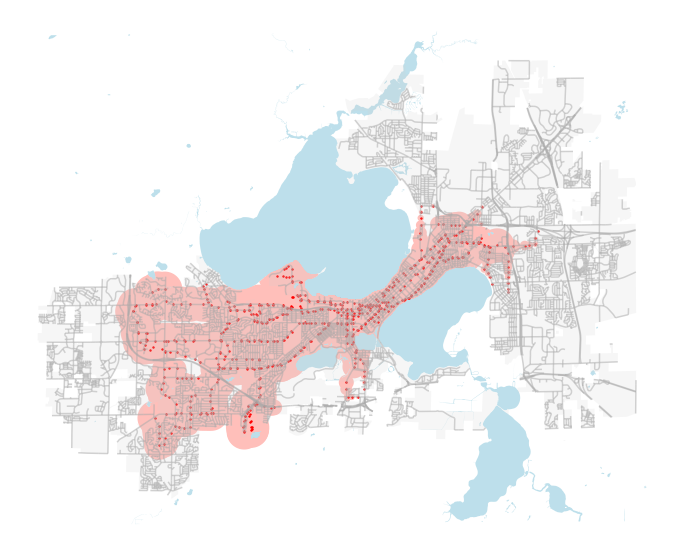

In [7]:
city = gpd.read_file("../data/plot/background/madison-shp")
lakes = gpd.read_file("../data/plot/background/water-shp")
street = gpd.read_file("../data/plot/background/street-shp")

ax = city.plot(color="lightgray", alpha=.2, figsize=(12, 12), zorder=2)
lakes.plot(color="lightblue", ax=ax, zorder=1, alpha=0.8)
street.plot(color="darkgray", alpha = .5, ax=ax, zorder=3)
gdf.difference(lakes.unary_union).plot(color="#ffbfba", ax=ax)
gdf.geometry_centriod.plot(color="red", ax=ax, markersize=2)

ax.set_axis_off() 